In [1]:
import numpy as np
from pyemittance.emittance_calc import EmitCalc
from pyemittance.optics import quad_rmat_mat2, propagate_sigma

# Create data

In [2]:
# Some beam covariance matrix
EMIT = 1e-9
BETA_X = 10
ALPHA_X = -1
GAMMA_X = (1+ALPHA_X**2)/BETA_X
SIGMA_X = np.sqrt(EMIT*BETA_X)
SIGMA_PX = np.sqrt(EMIT*GAMMA_X)
COV_X__PX = -ALPHA_X*EMIT


SIGMA_11 = SIGMA_X**2
SIGMA_12 = COV_X__PX
SIGMA_22 = SIGMA_PX**2

SIGMA0 = np.array([[SIGMA_11, SIGMA_12], [SIGMA_12, SIGMA_22]])

In [3]:
emit_calc = EmitCalc()

def beam_size_meas(kL, sigma0, Ltot=2.2, Lquad=0):
    mat2 = quad_rmat_mat2(kL, Lquad=Lquad)
    sigma1 = propagate_sigma(sigma0, mat2)
    return np.sqrt(sigma1[0,0])

@np.vectorize
def model(kL):
    return beam_size_meas(kL, SIGMA0, Ltot=2.26, Lquad=0.108)

kLlist = np.linspace(0.2, 0.7, 10)

# Make the data
meas =  np.array([model(k) for k in kLlist])

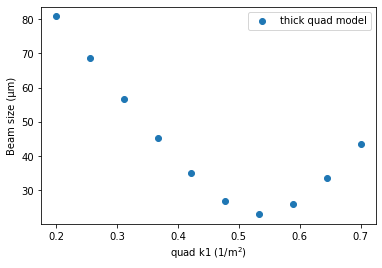

In [4]:
import matplotlib.pyplot as plt

plt.scatter(kLlist, meas*1e6, label='thick quad model')
plt.xlabel(r'quad k1 (1/m$^2$)')
plt.ylabel('Beam size (µm)')
plt.legend()

# Fit data w/ PyEmittance

In [6]:
# Handles I/O of data
from pyemittance.observer import Observer
# Handles optics and emittance/bmag calc
from pyemittance.emittance_calc import EmitCalc

In [9]:
meas

array([8.07898108e-05, 6.85981626e-05, 5.67077702e-05, 4.53346843e-05,
       3.49592836e-05, 2.67317695e-05, 2.30349799e-05, 2.58513979e-05,
       3.35517798e-05, 4.36002165e-05])

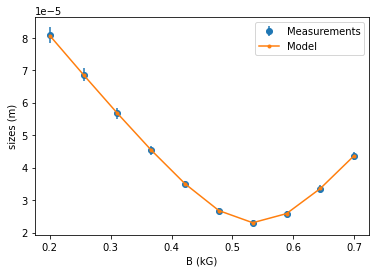

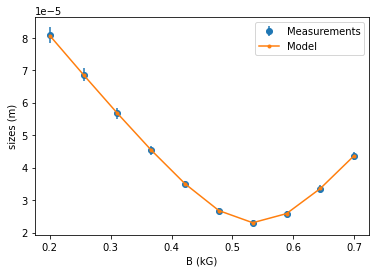

In [12]:
# Observer class handles all I/O
# avoids repeating measurements within an emittance calc
ef = EmitCalc({'x': kLlist,'y': kLlist},
              {'x': meas ,'y': meas},
              {'x': meas*0.03 ,'y': meas*0.03}
             )
ef.plot = True

emitx, erry = ef.get_emit(dim='x')
emity, erry = ef.get_emit(dim='y')

In [14]:
ef = EmitCalc({'x': kLlist,'y': kLlist},
              {'x': meas ,'y': meas},
              {'x': meas*0.03 ,'y': meas*0.03}
             )
ef.calc_bmag = True 


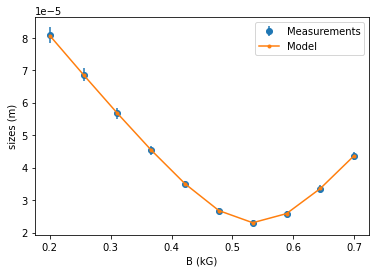

(1.1733253878383434e-06,
 2.331865862605872e-08,
 4.057961241777015,
 0.08064788667742774,
 0.2)

In [16]:
ef.get_emit(dim='x')